In [6]:
import yfinance as yf
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [7]:
data = yf.download("F",period = "1y")
data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-06,12.12,12.59,12.10,12.58,11.384616,53089100
2023-01-09,12.74,12.93,12.55,12.69,11.484163,50865500
2023-01-10,12.68,12.87,12.50,12.84,11.619909,47065500
2023-01-11,12.93,13.26,12.89,13.22,11.963800,51911600
2023-01-12,13.27,13.53,13.11,13.43,12.153847,58113700
...,...,...,...,...,...,...
2023-12-29,12.35,12.39,12.16,12.19,12.190000,40902400
2024-01-02,12.04,12.38,11.94,12.16,12.160000,47494800
2024-01-03,12.02,12.03,11.64,11.71,11.710000,70120100


In [8]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [9]:
df = data["Close"]
print(df)

Date
2023-01-06    12.58
2023-01-09    12.69
2023-01-10    12.84
2023-01-11    13.22
2023-01-12    13.43
              ...  
2023-12-29    12.19
2024-01-02    12.16
2024-01-03    11.71
2024-01-04    11.68
2024-01-05    11.85
Name: Close, Length: 251, dtype: float64


Text(0.5, 1.0, 'Trend for Closing Price')

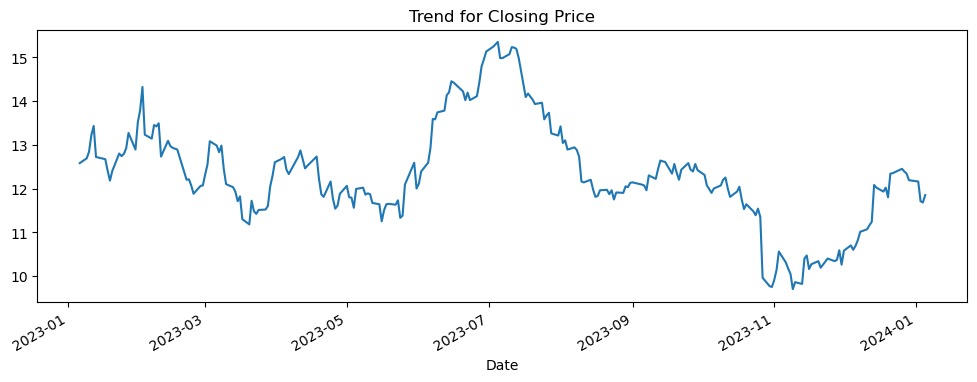

In [10]:
plt.figure(figsize=(12,4))
df.plot(linewidth = 1.5)
plt.title("Trend for Closing Price")

In [11]:
df1 = df.reset_index()
df1

,Date,Close
0,2023-01-06,12.58
1,2023-01-09,12.69
2,2023-01-10,12.84
3,2023-01-11,13.22
4,2023-01-12,13.43
...,...,...
246,2023-12-29,12.19
247,2024-01-02,12.16
248,2024-01-03,11.71
249,2024-01-04,11.68


In [12]:
df1.dtypes

Date     datetime64[ns]
Close           float64
dtype: object

In [13]:
# df1['Date'] = pd.to_datetime(df1['Date'])
df1['Day'] = df1['Date'].dt.day

In [14]:
df1['Month'] = df1['Date'].dt.month
df1['Weekday'] = df1['Date'].dt.day_name()

In [15]:
df1

,Date,Close,Day,Month,Weekday
0,2023-01-06,12.58,6,1,Friday
1,2023-01-09,12.69,9,1,Monday
2,2023-01-10,12.84,10,1,Tuesday
3,2023-01-11,13.22,11,1,Wednesday
4,2023-01-12,13.43,12,1,Thursday
...,...,...,...,...,...
246,2023-12-29,12.19,29,12,Friday
247,2024-01-02,12.16,2,1,Tuesday
248,2024-01-03,11.71,3,1,Wednesday
249,2024-01-04,11.68,4,1,Thursday


<Axes: xlabel='Date'>

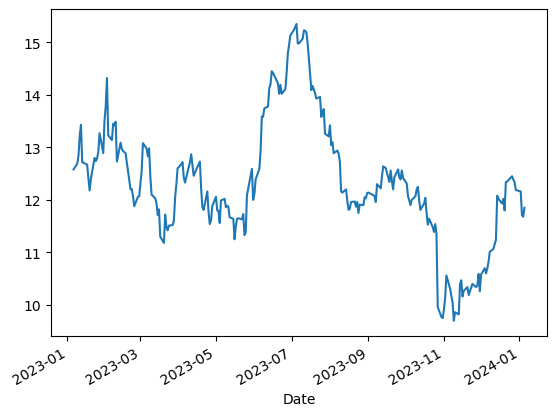

In [16]:
df1.groupby("Date")["Close"].mean().plot()

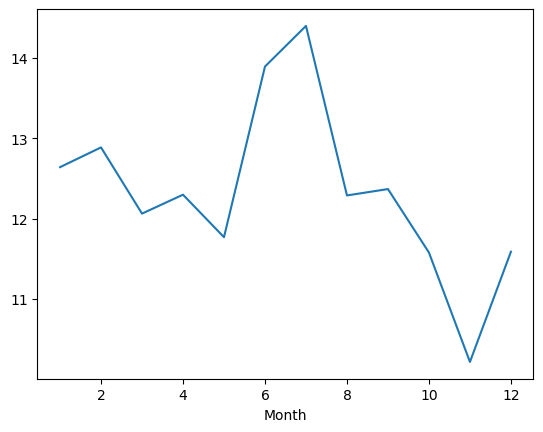

In [17]:
df1.groupby("Month")["Close"].mean().plot()
plt.show()

<Axes: xlabel='Day'>

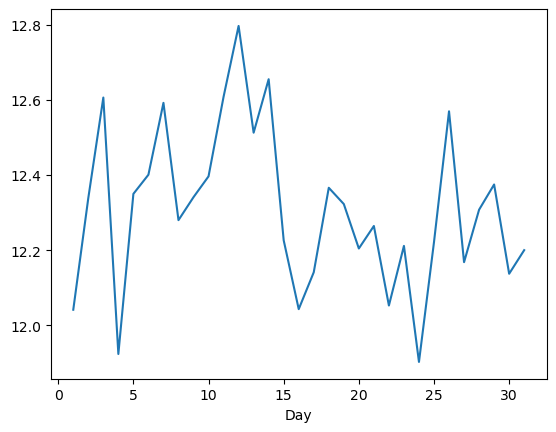

In [18]:
df1.groupby("Day")["Close"].mean().plot()

<Axes: xlabel='Weekday'>

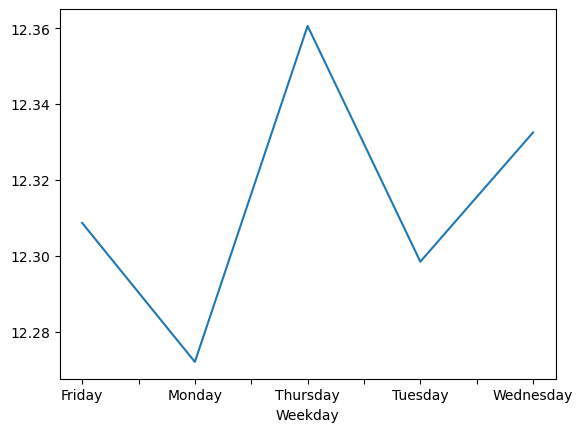

In [19]:
df1.groupby("Weekday")["Close"].mean().plot()

In [20]:
df1.groupby('Weekday')['Close'].mean().sort_index()

Weekday
Friday       12.308654
Monday       12.272000
Thursday     12.360588
Tuesday      12.298431
Wednesday    12.332500
Name: Close, dtype: float64

In [21]:
df

Date
2023-01-06    12.58
2023-01-09    12.69
2023-01-10    12.84
2023-01-11    13.22
2023-01-12    13.43
              ...  
2023-12-29    12.19
2024-01-02    12.16
2024-01-03    11.71
2024-01-04    11.68
2024-01-05    11.85
Name: Close, Length: 251, dtype: float64

<Axes: xlabel='Date'>

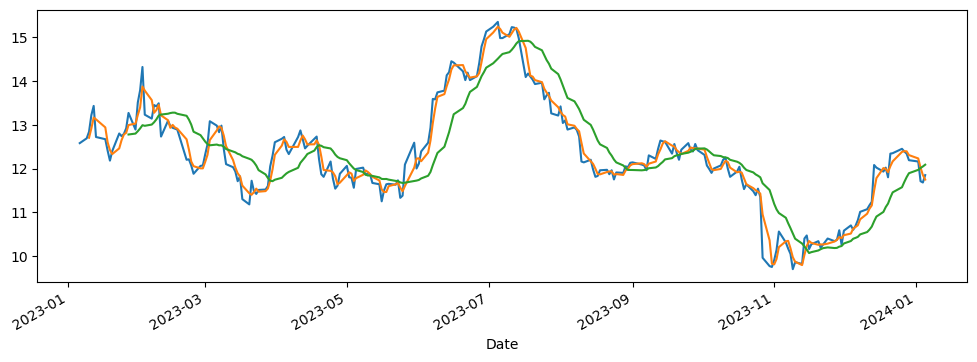

In [22]:
### Simple Moving Average - 3 , 15 days
plt.figure(figsize=(12,4))
df.plot()
df.rolling(3).mean().plot()
df.rolling(15).mean().plot()

<Axes: xlabel='Date'>

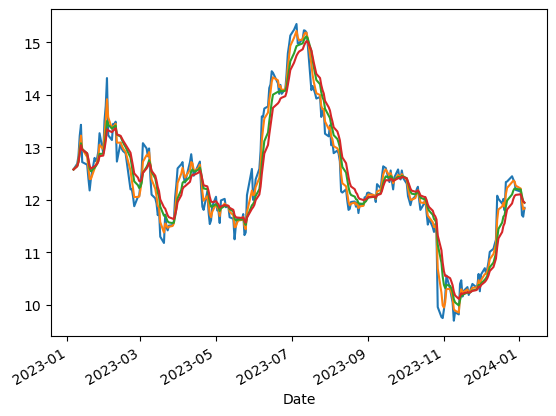

In [23]:
#### Exponential Moving Average
df.plot()
df.ewm(span=3).mean().plot()
df.ewm(span=7).mean().plot()
df.ewm(span=10).mean().plot()

ARIMA - Auto Regressive Integrated Moving average
Stationary - A stationary timeseries data is one whose properties
don't depend on time that is why timeseries with trends ,seasonality are not stationary data
stationary time series will have no predictable pattern in the longterm

In [24]:
from statsmodels.tsa.stattools import adfuller

In [25]:
test_result = adfuller(df)
test_result

(-1.837471197093064,
 0.3620232856742073,
 0,
 250,
 {'1%': -3.456780859712, '5%': -2.8731715065600003, '10%': -2.572968544},
 54.8293625177302)

In [26]:
df1 = df1[["Date","Close"]]
df1

,Date,Close
0,2023-01-06,12.58
1,2023-01-09,12.69
2,2023-01-10,12.84
3,2023-01-11,13.22
4,2023-01-12,13.43
...,...,...
246,2023-12-29,12.19
247,2024-01-02,12.16
248,2024-01-03,11.71
249,2024-01-04,11.68


In [27]:
df1["Close_first_diff"] = df1['Close'] - df1['Close'].shift(1)
df1['Close_first_diff']

C:\Users\admin\AppData\Local\Temp\ipykernel_14820\3878192076.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Close_first_diff"] = df1['Close'] - df1['Close'].shift(1)


0           NaN
1      0.110000
2      0.150001
3      0.380000
4      0.210000
         ...   
246   -0.150001
247   -0.030000
248   -0.450000
249   -0.030000
250    0.170000
Name: Close_first_diff, Length: 251, dtype: float64

In [28]:
df1["Close_first_seasonal_diff"] = df1['Close'] - df1['Close'].shift(12)
df1['Close_first_seasonal_diff']

C:\Users\admin\AppData\Local\Temp\ipykernel_14820\4237567746.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Close_first_seasonal_diff"] = df1['Close'] - df1['Close'].shift(12)


0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
246    1.03
247    0.92
248   -0.37
249   -0.34
250   -0.08
Name: Close_first_seasonal_diff, Length: 251, dtype: float64

In [29]:
df1['Close_first_diff'].dropna()

1      0.110000
2      0.150001
3      0.380000
4      0.210000
5     -0.710000
         ...   
246   -0.150001
247   -0.030000
248   -0.450000
249   -0.030000
250    0.170000
Name: Close_first_diff, Length: 250, dtype: float64

In [30]:
test_result = df1["Close_first_diff"].dropna()
test_result

1      0.110000
2      0.150001
3      0.380000
4      0.210000
5     -0.710000
         ...   
246   -0.150001
247   -0.030000
248   -0.450000
249   -0.030000
250    0.170000
Name: Close_first_diff, Length: 250, dtype: float64

<Axes: >

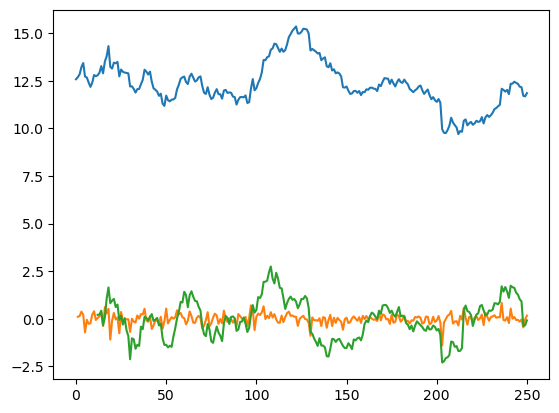

In [31]:
df1['Close'].plot()
df1['Close_first_diff'].plot()
df1['Close_first_seasonal_diff'].plot()

<Axes: >

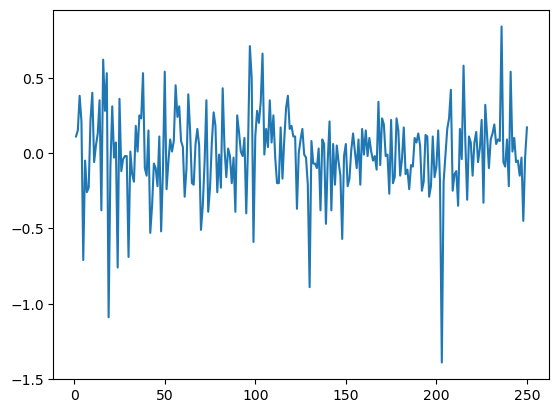

In [32]:
df1['Close_first_diff'].plot()

In [33]:
from pandas.plotting import autocorrelation_plot

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

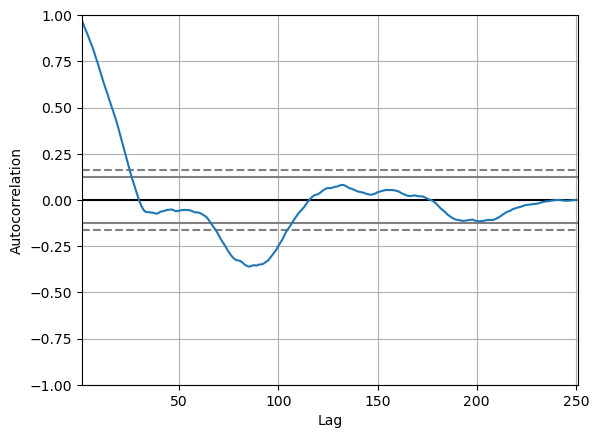

In [34]:
autocorrelation_plot(df1['Close'])

In [35]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

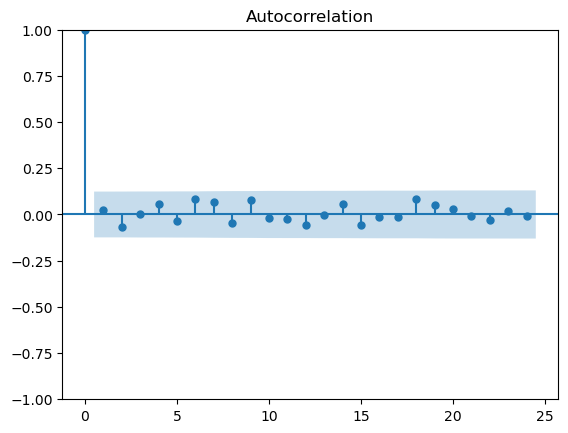

In [36]:
plot_acf(df1['Close_first_diff'].dropna())    ### p = 1
plt.show()

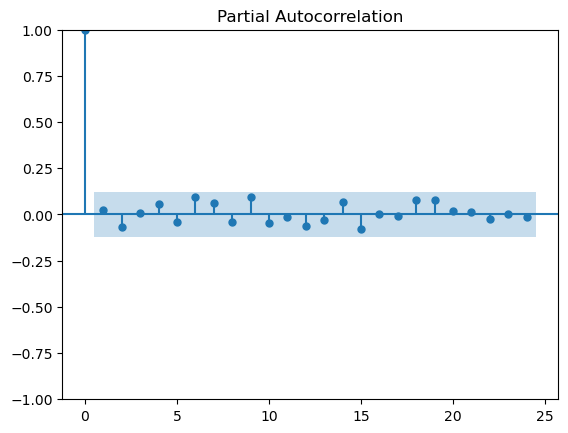

In [37]:
plot_pacf(df1['Close_first_diff'].dropna())    ### q = 1
plt.show()

In [38]:
#### order = p,d,q(1,1,1)
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
model = ARIMA(df1['Close'],order = (1,1,1))
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  251
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -32.515
Date:                Sat, 06 Jan 2024   AIC                             71.031
Time:                        11:24:08   BIC                             81.595
Sample:                             0   HQIC                            75.283
                                - 251                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3894      1.335     -0.292      0.770      -3.005       2.227
ma.L1          0.4290      1.308      0.328      0.743      -2.134       2.992
sigma2         0.0759      0.004     18.421      0.000       0.068       0.084
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):               153.68
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               0.69   Skew:                            -0.78
Prob(H) (two-sided):                  0.10   Kurtosis:                         6.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: >

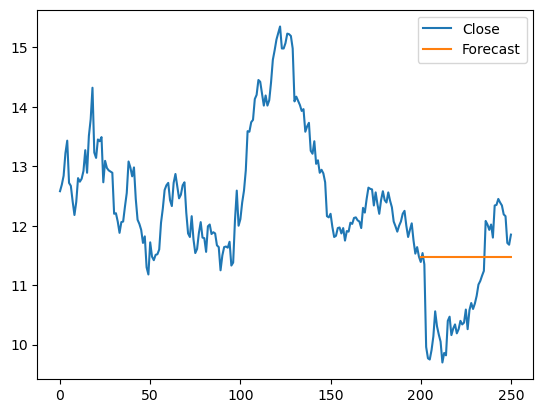

In [39]:
df1['Forecast'] = model_fit.predict(start = 200, end = 260,dynamic = True)
df1[['Close','Forecast']].plot()

In [40]:
import statsmodels.api as sm
model = sm.tsa.statespace.SARIMAX(df1['Close'],order = (1,1,1),seasonal_order=(1,1,1,12))
results = model.fit()
print(results)

<Axes: >

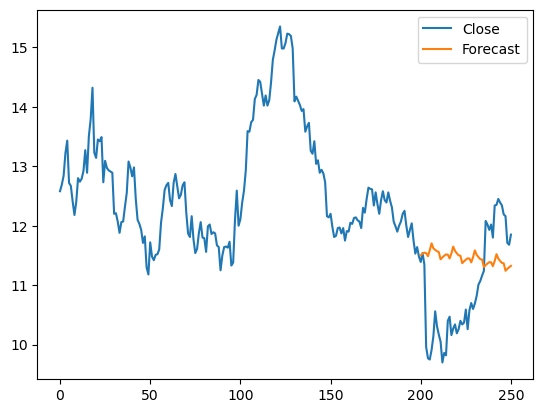

In [41]:
df1['Forecast'] = results.predict(start = 200,end = 260,dynamic = True)
df1[['Close','Forecast']].plot()

In [42]:
df1

,Date,Close,Close_first_diff,Close_first_seasonal_diff,Forecast
0,2023-01-06,12.58,NaN,NaN,NaN
1,2023-01-09,12.69,0.110000,NaN,NaN
2,2023-01-10,12.84,0.150001,NaN,NaN
3,2023-01-11,13.22,0.380000,NaN,NaN
4,2023-01-12,13.43,0.210000,NaN,NaN
...,...,...,...,...,...
246,2023-12-29,12.19,-0.150001,1.03,11.367273
247,2024-01-02,12.16,-0.030000,0.92,11.242547
248,2024-01-03,11.71,-0.450000,-0.37,11.273643
249,2024-01-04,11.68,-0.030000,-0.34,11.301024


In [43]:
dd = pd.DataFrame(pd.date_range('2023-12-11','2023-12-15'),columns=['Date'])
dd

,Date
0,2023-12-11
1,2023-12-12
2,2023-12-13
3,2023-12-14
4,2023-12-15


In [44]:
dd.set_index('Date',inplace = True)

In [45]:
dd

""
Date
2023-12-11
2023-12-12
2023-12-13
2023-12-14
2023-12-15


In [46]:
#### Forecast for the next 3 years
Forecast = results.predict(start = len(df1),
                           end = (len(df1)-1 + 3*12),
                           typ = 'levels').rename('Forecast')

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


<Axes: >

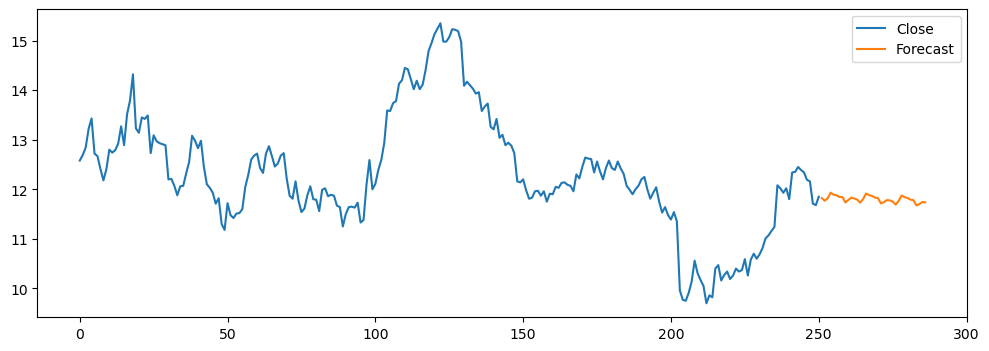

In [47]:
df1['Close'].plot(figsize=(12,4),legend = True)
Forecast.plot(legend = True)